# Implement the pocket algorithm
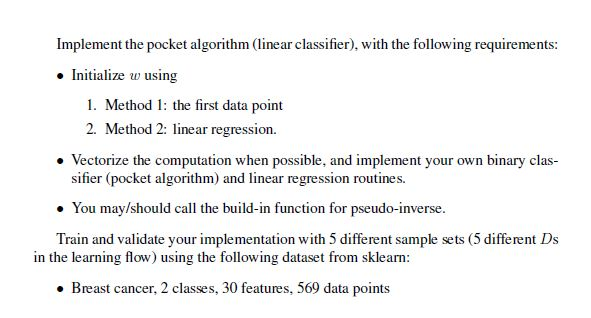 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

class Perceptron:
  def __init__(self, X, label, X_test, y_test, epoches, error=0.01, w_i='i'):
    # add the 1 to the first column in X, corresponding to w0, bias b
    self.X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
    self.n_rows = self.X.shape[0]
    self.n_columns = self.X.shape[1]
    self.y = label
    self.X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), 1)
    self.y_test = y_test
    self.W_init(w_i)
    self.max_eps = epoches
    self.error = error
    self.loss_hist_in = list()
    self.loss_hist_out = list()

  def W_init(self, w_i):
    # This function is used to initialize weight w
    # parameter w_i is a char: i - input; r - randomly; z - zeros; l - linear regression
    # no return, assign corresponding weight matrix
    if w_i == 'i':
      self.W = self.X[0].copy()
    elif w_i == 'r':
      self.W = np.random.random((self.n_columns,))
    elif w_i == 'z':
      self.W = np.zeros((self.n_columns,))
    elif w_i == 'l':
      self.W = np.dot(np.linalg.pinv(self.X), self.y)
    else:
      print('The allowed input is: i - first input, r - randomly, z - zeros!')


  def predict(self, i):
    return np.sign(np.dot(self.X[i], self.W.T))

  def evaluate(self):
    y_diff = np.sign(np.dot(self.X, self.W.T)) - self.y
    return sum(np.abs(y_diff))/2

  def test(self, X, Y):
    y_diff = np.sign(np.dot(X, self.W.T)) - Y
    return sum(np.abs(y_diff))/2

  def train(self):
    for _ in range(self.max_eps+1):
      n_miss = 0
      if _%100 == 0:
        n_miss_in = self.test(self.X, self.y)
        n_miss_out = self.test(self.X_test, self.y_test)
        self.loss_hist_in.append(n_miss_in/self.n_rows)
        self.loss_hist_out.append(n_miss_out/100)
        print("n_iter:", _, "miss_rate:", self.evaluate()/self.n_rows, sep='\t')
      for i in range(self.n_rows):
        prv = self.predict(i)
        if prv != self.y[i]:
          n_miss += 1
          self.W = self.W + self.y[i]*self.X[i]
      # print(n_miss)
      if n_miss == 0:
        return self.w
    return self.W


class pocket(Perceptron):
  def __init__(self, X, label, X_test, y_test, epoches, error=0.01, w_i='i'):
    super(pocket, self).__init__(X, label, X_test, y_test, epoches, error=0.01, w_i='i') 
    self.best_W = self.W
    self.best_loss = 1

  def test(self, X, Y):
    y_diff = np.sign(np.dot(X, self.best_W.T)) - Y
    return sum(np.abs(y_diff))/2

  def train(self):
    n_iter = 0
    while(n_iter <= self.max_eps and self.best_loss >= self.error):
      if n_iter%100 == 0:
        n_miss_in = self.test(self.X, self.y)
        n_miss_out = self.test(self.X_test, self.y_test)
        self.loss_hist_in.append(n_miss_in/self.n_rows)
        self.loss_hist_out.append(n_miss_out/100)
      for i in range(self.n_rows):
        if self.predict(i) != self.y[i]:
          self.W += self.y[i]*self.X[i]
          n_miss = self.evaluate()
          if n_miss/self.n_rows < self.best_loss:
            if self.best_loss == 1:
              print('eps:', n_iter, 'rows:', i, sep='\t')
              print(self.X[i])
              print(self.W[:5])
              print(n_miss)
            self.best_loss = n_miss/self.n_rows
            self.best_W = self.W.copy()
            print('best_loss:', self.best_loss, 'best_W:', self.best_W[:3], sep='\t')
            print('...................................')
      n_iter += 1   
    return self.best_W


In [ ]:
import sklearn.datasets as ds 
bc = ds.load_breast_cancer()
X_bc = bc.data
y_bc = bc.target
y_bc[y_bc==0] = -1                # convert 0 to -1 in target

In [ ]:
# train the Perceptron model
loss_mat_pc_i_in = list()   # store loss history of training data for initialization of first input data
loss_mat_pc_i_out = list()  # store loss history of test data for initialization of first input data
loss_mat_pc_r_in = list()   # store loss history of training data for initialization of random
loss_mat_pc_r_out = list()  # store loss history of test data for initialization of random
loss_mat_pc_l_in = list()   # store loss history of training data for initialization of linear regression weight
loss_mat_pc_l_out = list()  # store loss history of test data for initialization of linear regression weight
for i in range(5):
  X_bc_train = np.concatenate((X_bc[:i*100], X_bc[(i+1)*100:]), axis=0)
  y_bc_train = np.concatenate((y_bc[:i*100], y_bc[(i+1)*100:]), axis=0)
  X_bc_test = X_bc[i*100: (i+1)*100]
  y_bc_test = y_bc[i*100: (i+1)*100]
  pc_i = Perceptron(X_bc_train, y_bc_train, X_bc_test, y_bc_test, 10000, 0.01, 'i')
  pc_i.train()
  loss_mat_pc_i_in.append(pc_i.loss_hist_in)
  loss_mat_pc_i_out.append(pc_i.loss_hist_out)
  pc_r = Perceptron(X_bc_train, y_bc_train, X_bc_test, y_bc_test, 10000, 0.01, 'r')
  pc_r.train()
  loss_mat_pc_r_in.append(pc_r.loss_hist_in)
  loss_mat_pc_r_out.append(pc_r.loss_hist_out)
  pc_l = Perceptron(X_bc_train, y_bc_train, X_bc_test, y_bc_test, 10000, 0.01, 'l')
  pc_l.train()
  loss_mat_pc_l_in.append(pc_l.loss_hist_in)
  loss_mat_pc_l_out.append(pc_l.loss_hist_out)

In [ ]:
# train the Pocket model
loss_mat_i_in = list()   # store loss history of training data for initialization of first input data
loss_mat_i_out = list()  # store loss history of test data for initialization of first input data
loss_mat_r_in = list()   # store loss history of training data for initialization of random
loss_mat_r_out = list()  # store loss history of test data for initialization of random
loss_mat_l_in = list()   # store loss history of training data for initialization of linear regression weight
loss_mat_l_out = list()  # store loss history of test data for initialization of linear regression weight
for i in range(5):
  X_bc_train = np.concatenate((X_bc[:i*100], X_bc[(i+1)*100:]), axis=0)
  y_bc_train = np.concatenate((y_bc[:i*100], y_bc[(i+1)*100:]), axis=0)
  X_bc_test = X_bc[i*100: (i+1)*100]
  y_bc_test = y_bc[i*100: (i+1)*100]
  pkt_i = pocket(X_bc_train, y_bc_train, X_bc_test, y_bc_test, 10000, 0.01, 'i')
  pkt_i.train()
  loss_mat_i_in.append(pkt_i.loss_hist_in)
  loss_mat_i_out.append(pkt_i.loss_hist_out)
  pkt_r = pocket(X_bc_train, y_bc_train, X_bc_test, y_bc_test, 10000, 0.01, 'r')
  pkt_r.train()
  loss_mat_r_in.append(pkt_r.loss_hist_in)
  loss_mat_r_out.append(pkt_r.loss_hist_out)
  pkt_l = pocket(X_bc_train, y_bc_train, X_bc_test, y_bc_test, 10000, 0.01, 'l')
  pkt_l.train()
  loss_mat_l_in.append(pkt_l.loss_hist_in)
  loss_mat_l_out.append(pkt_l.loss_hist_out)



In [5]:
# calculate the average loss for various initializations
loss_mat_pc_i_in = np.array(loss_mat_pc_i_in).mean(axis=0)
loss_mat_pc_i_out = np.array(loss_mat_pc_i_out).mean(axis=0)
loss_mat_pc_r_in = np.array(loss_mat_pc_r_in).mean(axis=0)
loss_mat_pc_r_out = np.array(loss_mat_pc_r_out).mean(axis=0)
loss_mat_pc_l_in = np.array(loss_mat_pc_l_in).mean(axis=0)
loss_mat_pc_l_out = np.array(loss_mat_pc_l_out).mean(axis=0)

loss_mat_i_in = np.array(loss_mat_i_in).mean(axis=0)
loss_mat_i_out = np.array(loss_mat_i_out).mean(axis=0)
loss_mat_r_in = np.array(loss_mat_r_in).mean(axis=0)
loss_mat_r_out = np.array(loss_mat_r_out).mean(axis=0)
loss_mat_l_in = np.array(loss_mat_l_in).mean(axis=0)
loss_mat_l_out = np.array(loss_mat_l_out).mean(axis=0)

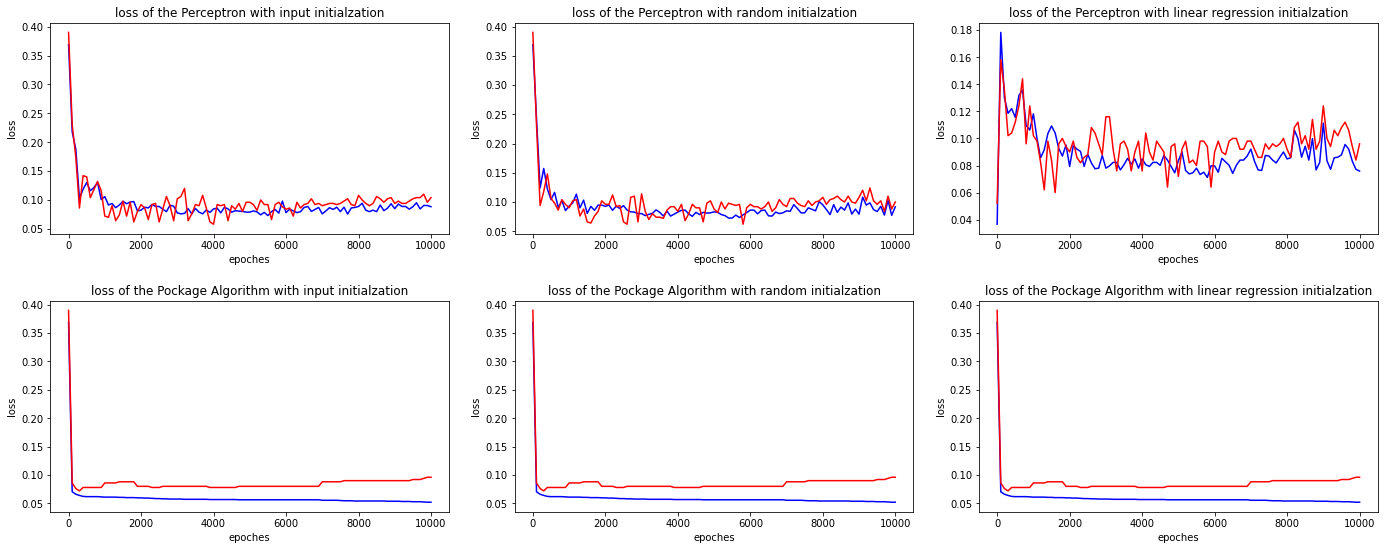

In [8]:
# visualize loss for various initializations
import matplotlib.pyplot as plt
x = range(0, 10001, 100)
fig, ax = plt.subplots(2,3, figsize=(20,8))
ax[0,0].plot(x, loss_mat_pc_i_in, 'b', label="loos_i_in")
ax[0,0].plot(x, loss_mat_pc_i_out, 'r', label="loos_i_out")
ax[0,0].set_xlabel('epoches')
ax[0,0].set_ylabel('loss')
ax[0,0].set_title('loss of the Perceptron with input initialzation')
ax[0,1].plot(x, loss_mat_pc_r_in, 'b', label="loos_r_in")
ax[0,1].plot(x, loss_mat_pc_r_out, 'r', label="loos_r_out")
ax[0,1].set_xlabel('epoches')
ax[0,1].set_ylabel('loss')
ax[0,1].set_title('loss of the Perceptron with random initialzation')
ax[0,2].plot(x, loss_mat_pc_l_in, 'b', label="loos_l_in")
ax[0,2].plot(x, loss_mat_pc_l_out, 'r', label="loos_l_out")
ax[0,2].set_xlabel('epoches')
ax[0,2].set_ylabel('loss')
ax[0,2].set_title('loss of the Perceptron with linear regression initialzation')
ax[1,0].plot(x, loss_mat_i_in, 'b', label="loos_i_in")
ax[1,0].plot(x, loss_mat_i_out, 'r', label="loos_i_out")
ax[1,0].set_xlabel('epoches')
ax[1,0].set_ylabel('loss')
ax[1,0].set_title('loss of the Pockage Algorithm with input initialzation')
ax[1,1].plot(x, loss_mat_r_in, 'b', label="loos_r_in")
ax[1,1].plot(x, loss_mat_r_out, 'r', label="loos_r_out")
ax[1,1].set_xlabel('epoches')
ax[1,1].set_ylabel('loss')
ax[1,1].set_title('loss of the Pockage Algorithm with random initialzation')
ax[1,2].plot(x, loss_mat_l_in, 'b', label="loos_l_in")
ax[1,2].plot(x, loss_mat_l_out, 'r', label="loos_l_out")
ax[1,2].set_xlabel('epoches')
ax[1,2].set_ylabel('loss')
ax[1,2].set_title('loss of the Pockage Algorithm with linear regression initialzation')
fig.tight_layout(pad=2.0)
plt.show()